# Amazon Alexa Reviews Sentiment Analysis
The dataset was gotten from [kaggle](https://www.kaggle.com/roshansharma/amazon-alexa-reviews/data?select=amazon_alexa.tsv)

### Declare important modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data = pd.read_csv('dataset/amazon_alexa.tsv',  sep='\t')
data.head()

#data = pd.read_csv('dataset/amazon_alexa.tsv',  delimiter='\t')
#data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Describe Dataset

In [3]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
data.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

The dataset's rating column contains **Ordinal Data** of the ratings given by the users of Amazon Alexa on a scale of 1 to 5.

Reference
* [Types of Statistical Data](http://scaryscientist.blogspot.com/2015/02/classification-of-data-types.html)
* [Norminal, Ordinal, Interval, Ratio](https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/)

In [6]:
ratings = data["rating"].value_counts()
print(ratings, "\n")

numbers = ratings.index
print(numbers, "\n")

quantity = ratings.values
print(quantity)

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64 

Int64Index([5, 4, 1, 3, 2], dtype='int64') 

[2286  455  161  152   96]


### Data Visualization

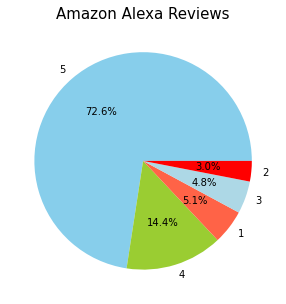

In [7]:
custom_colors = ["skyblue", "yellowgreen", 'tomato', "lightblue", "red"]

plt.figure(figsize = (5, 5))

plt.pie(quantity, labels=numbers, autopct='%1.1f%%',
        colors=custom_colors)
plt.title("Amazon Alexa Reviews", fontsize = 15)
plt.show()

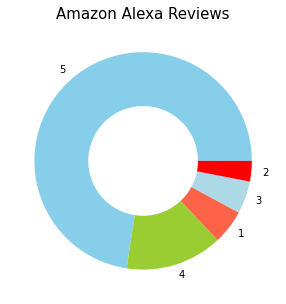

In [8]:
plt.figure(figsize=(5, 5))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Amazon Alexa Reviews", fontsize=15)
plt.show()

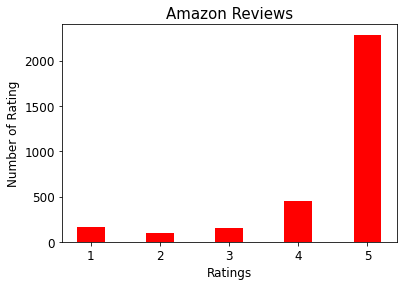

In [9]:
plt.bar(numbers, quantity, color = 'red', width=0.4)
plt.xlabel("Ratings")
plt.ylabel("Number of Rating")
plt.title("Amazon Reviews", fontsize = 15)
plt.show()

### Reviews Sentiment Analysis
Use Natural Language Processing tools to calculate the sentiment of the data in the verified_reviews column. So new columns positibe, neutral, and negative are added to calculate sentiment scores of the reviews

In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["verified_reviews"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["verified_reviews"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["verified_reviews"]]
data.head(5)

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊")
    elif (b>a) and (b>c):
        print("Negative 😠")
    else:
        print("Neutral 🙂")
        
sentiment_score(x, y, z)

In [ ]:
print("Positive: {}".format(x))
print("Negative: {}".format(y))
print("Neutral: {}".format(z))

The results of the sentiment analysis indicates that Neutral and Positive were both above 1000 and greater than the Negative by over a factor of 10. The Negative was below 100. 

In conclusion, most Amazon Alexa customers were satified with the product.